In [1]:
import pandas as pd

In [2]:
data =pd.read_csv('pima-indians-diabetes.csv')

In [3]:
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
data.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
data[cols]  = data[cols].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [7]:
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

In [9]:
data.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dia_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [11]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [12]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

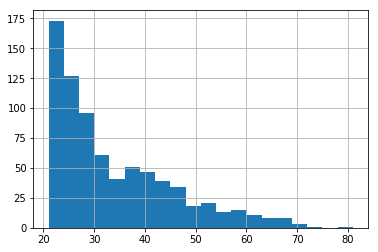

In [14]:
data['Age'].hist(bins=20)

In [15]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [16]:
feat_cols = [num_preg,plasma_gluc,dia_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [17]:
x_data = data.drop('Class',axis=1)

In [18]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [19]:
labels = data['Class']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [22]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [23]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\MANHLE~1\\AppData\\Local\\Temp\\tmphpr5m213', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002170ED49908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\MANHLE~1\AppData\Local\Temp\tmphpr5m213\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 227.575
INFO:tensorflow:loss = 5.339481, step = 101 (0.444 sec)
INFO:tensorflow:global_step/sec: 420.308
INFO:tensorflow:loss = 6.500746, step = 201 (0.236 sec)
INFO:tensorflow:global_step/sec: 434.93
INFO:tensorflow:loss = 3.2100484, step = 301 (0.230 sec)
INFO:tensorflow:global_step/sec: 476.345
INFO:tensorflow:loss = 4.6432304,

In [26]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [27]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-09-02:48:01
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MANHLE~1\AppData\Local\Temp\tmphpr5m213\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-09-02:48:02
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.80765426, auc_precision_recall = 0.6504657, average_loss = 0.5249377, global_step = 1000, label/mean = 0.35064936, loss = 5.0525255, precision = 0.6486486, prediction/mean = 0.3857992, recall = 0.5925926
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\MANHLE~1\AppData\Local\Temp\tmphpr5m213\model.ckpt-1000


In [29]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80765426,
 'auc_precision_recall': 0.6504657,
 'average_loss': 0.5249377,
 'label/mean': 0.35064936,
 'loss': 5.0525255,
 'precision': 0.6486486,
 'prediction/mean': 0.3857992,
 'recall': 0.5925926,
 'global_step': 1000}

In [30]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [31]:
predictions = model.predict(pred_input_func)

In [32]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MANHLE~1\AppData\Local\Temp\tmphpr5m213\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [33]:
my_pred

[{'logits': array([0.1371851], dtype=float32),
  'logistic': array([0.53424263], dtype=float32),
  'probabilities': array([0.46575743, 0.53424263], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.7265854], dtype=float32),
  'logistic': array([0.6740555], dtype=float32),
  'probabilities': array([0.32594448, 0.6740555 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.5211829], dtype=float32),
  'logistic': array([0.37257567], dtype=float32),
  'probabilities': array([0.6274243 , 0.37257567], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.5076888], dtype=float32),
  'logistic': array([0.3757355], dtype=float32),
  'probabilities': array([0.6242645 , 0.37573543], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': 

In [34]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\MANHLE~1\\AppData\\Local\\Temp\\tmpt81repuv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002171B624198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [35]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [36]:
feat_cols = [num_preg,plasma_gluc,dia_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [37]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [38]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\MANHLE~1\\AppData\\Local\\Temp\\tmpjxz7rtqw', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002171B6273C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [39]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\MANHLE~1\AppData\Local\Temp\tmpjxz7rtqw\model.ckpt.
INFO:tensorflow:loss = 6.5007467, step = 1
INFO:tensorflow:global_step/sec: 253.276
INFO:tensorflow:loss = 6.5674458, step = 101 (0.399 sec)
INFO:tensorflow:global_step/sec: 423.869
INFO:tensorflow:loss = 4.242586, step = 201 (0.234 sec)
INFO:tensorflow:global_step/sec: 458.869
INFO:tensorflow:loss = 5.0240993, step = 301 (0.220 sec)
INFO:tensorflow:global_step/sec: 458.865
INFO:tensorflow:loss = 4.643645, step = 401 (0.216 sec)
INFO:tensorflow:global_step/sec: 463.117
INFO:tensorflow:loss = 3.53239, step = 501 (0.220 sec)
INFO:tensorflow:global_step/sec: 469.64
INFO:tensorflow:loss = 5.273505, step = 601 (0.211 sec)
INFO:tensorflow:global_step/sec

In [40]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [41]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-09-02:56:07
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MANHLE~1\AppData\Local\Temp\tmpjxz7rtqw\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-09-02:56:08
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7619048, accuracy_baseline = 0.64935064, auc = 0.8430041, auc_precision_recall = 0.7674482, average_loss = 0.47935158, global_step = 1000, label/mean = 0.35064936, loss = 4.613759, precision = 0.6969697, prediction/mean = 0.2962624, recall = 0.56790125
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\MANHLE~1\AppData\Local\Temp\tmpjxz7rtqw\model.ckpt-1000


{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8430041,
 'auc_precision_recall': 0.7674482,
 'average_loss': 0.47935158,
 'label/mean': 0.35064936,
 'loss': 4.613759,
 'precision': 0.6969697,
 'prediction/mean': 0.2962624,
 'recall': 0.56790125,
 'global_step': 1000}